In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import PredictionErrorDisplay ,mean_squared_error

In [2]:
data = pd.read_excel('PNP_data-scaled.xlsx') #specific stiffness values are divided by10^7

# remove rows with null value
data = data.dropna(how='any',axis=0) 

# select features and target variable
features = data.iloc[:, :-2]  # all columns except the last two
print(features)
#target = data.iloc[:, -2:-1]     # stiffness
target = data.iloc[:, -1]     # specific stiffness
print(target)


          l_N       h_N       l_P       h_P       t     theta  theta_hex  \
0    0.004587  0.008337  0.004109  0.002359  0.0005  0.756309   0.872665   
1    0.003768  0.007070  0.005272  0.000772  0.0003  0.989020   0.639954   
2    0.003034  0.007535  0.002078  0.003759  0.0004  0.581776   0.930842   
3    0.001995  0.006096  0.001995  0.003904  0.0008  0.989020   0.989020   
4    0.003768  0.007070  0.004328  0.002030  0.0002  0.989020   0.814487   
..        ...       ...       ...       ...     ...       ...        ...   
825  0.003034  0.007535  0.001995  0.003904  0.0004  0.581776   0.989020   
826  0.003034  0.007535  0.003334  0.002113  0.0008  0.581776   0.523599   
827  0.002429  0.006767  0.001995  0.003904  0.0002  0.756309   0.989020   
829  0.001995  0.006096  0.003334  0.002113  0.0006  0.989020   0.523599   
830  0.002078  0.006241  0.003334  0.002113  0.0006  0.930842   0.523599   

      plate_N  plate_hex  
0    0.003911   0.003911  
1    0.002822   0.000644  
2    0

In [3]:
# split data (80% of  dataset into  training set and  other 20% into test data)
X1_train, X1_test, y1_train, y1_test = train_test_split(features, target, test_size = 0.1,random_state=0, shuffle=False)  #480 training and 120 testing datasets
#print(X1_train)      #type= pandas.core.frame.DataFrame

In [4]:
# Feature scaling
scaler = StandardScaler()  

X1s_train = scaler.fit_transform(X1_train)  # numpy.ndarray
X1s_test = scaler.transform(X1_test)    # numpy.ndarray

In [5]:
# MLP- Multilayer Perceptron
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=10000, batch_size=50 ,learning_rate_init=0.0001, learning_rate='adaptive',solver='adam', activation='tanh')  
mlp.fit(X1s_train, y1_train.values.ravel())

MLPRegressor(activation='tanh', batch_size=50,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='adaptive',
             learning_rate_init=0.0001, max_iter=10000)

In [6]:
predictions1 = mlp.predict(X1s_test) 

In [7]:
# Evaluation of algorithm performance

r2=r2_score(y1_test, predictions1)
print(r2)

0.9949425688937727


<AxesSubplot:>

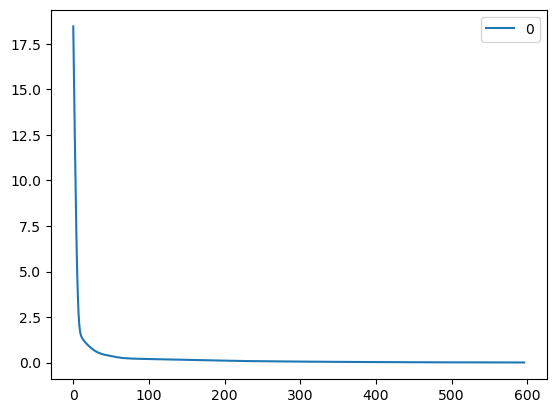

In [8]:
pd.DataFrame(mlp.loss_curve_).plot()

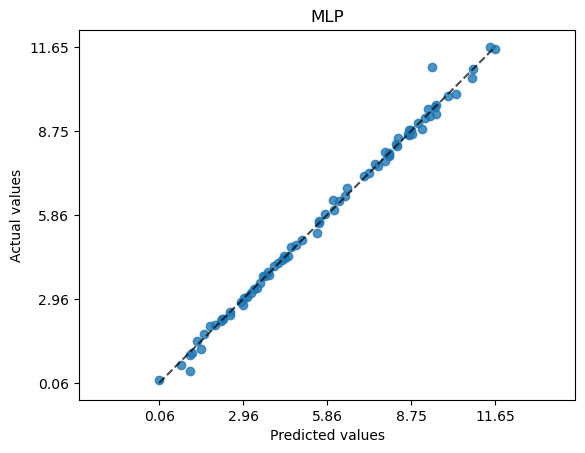

In [9]:
# visualize the prediction error

_, ax = plt.subplots()
PredictionErrorDisplay.from_estimator(mlp, X1s_test, y1_test, kind="actual_vs_predicted", ax=ax)
ax.set_title("MLP")
plt.show()

In [10]:
from SALib.sample import saltelli
from SALib.analyze import sobol


problem = {
    'num_vars': 9,
    'names': [ 'l_N', 'h_N', 'l_P' ,'h_P', 't', 'theta',  'theta_hex',  'plate_N',  'plate_hex'],
    'bounds': [[-1,1]*9]
}

#If `calc_second_order` is False, the resulting matrix has ``N * (D + 2)`` rows, 
#where ``D`` is the number of parameters. If `calc_second_order` is `True`, the resulting matrix has ``N * (2D + 2)`` rows.
param_values = saltelli.sample(problem, 4096, calc_second_order = True)    

C:\Users\fhassani\AppData\Local\Temp\ipykernel_18676\2746711506.py:13: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 4096, calc_second_order = True)


In [11]:

Y = np.zeros([param_values.shape[0]])
Y = mlp.predict(param_values)    

# Perform Sobol Analysis
Si = sobol.analyze(problem, Y)     


C:\Users\fhassani\AppData\Roaming\Python\Python39\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


C:\Users\fhassani\AppData\Roaming\Python\Python39\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


[                 ST   ST_conf
l_N        0.375832  0.018269
h_N        0.044725  0.002479
l_P        0.207717  0.009960
h_P        0.021461  0.001823
t          0.197684  0.012263
theta      0.087019  0.005134
theta_hex  0.120302  0.007432
plate_N    0.036535  0.002558
plate_hex  0.020883  0.001557,                  S1   S1_conf
l_N        0.348676  0.025511
h_N        0.040434  0.010127
l_P        0.171373  0.018817
h_P        0.003567  0.006186
t          0.163556  0.019682
theta      0.060762  0.011820
theta_hex  0.099320  0.016142
plate_N    0.016023  0.008176
plate_hex  0.003272  0.005342,                               S2   S2_conf
(l_N, h_N)             -0.002949  0.028669
(l_N, l_P)              0.005066  0.031764
(l_N, h_P)              0.000382  0.028198
(l_N, t)                0.003376  0.031598
(l_N, theta)            0.001058  0.029564
(l_N, theta_hex)       -0.000807  0.029902
(l_N, plate_N)          0.000337  0.028926
(l_N, plate_hex)       -0.002296  0.028580
(h_N, l_P)

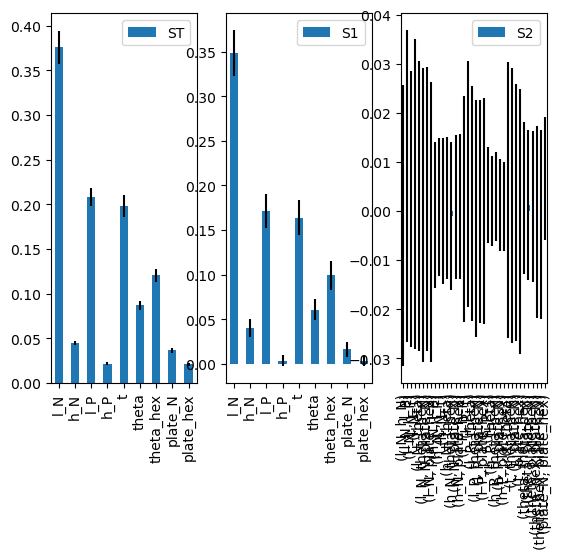

In [12]:
# Turn output to a Pandas DataFrame for further analysis
total_Si, first_Si, second_Si = Si.to_df()
Si.plot()
print(Si.to_df())